In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('./data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

{'init': 'epsg:4326'}


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [3]:
zipcodes.shape

(56, 6)

In [4]:
zipcodes.crs = 'EPSG:4326'
print(zipcodes.crs)

EPSG:4326


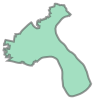

In [5]:
zipcodes.loc[0,'geometry']

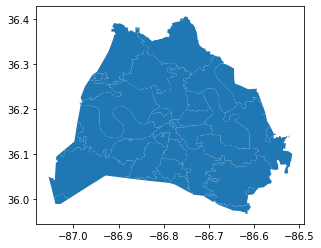

In [6]:
zipcodes.plot();

In [7]:
art = pd.read_csv('./data/Art_in_Public_Places__Map_.csv')
print(art.shape)
art.head(3)

(162, 10)


,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,Tommy Owen,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.128560,-86.836600,"(36.12856, -86.8366)"
1,Water Fountain Shelter,Lewis,E.C.,"South 20th Street and Shelby Ave, Nashville, TN",Concrete,Sculpture,NaN,36.169860,-86.735950,"(36.16986, -86.73595)"
2,The Waterfall Mural,Deese,Bryan,"917 Woodland Street, Nashville TN",Latex paint and spray paint,Mural,Mural painted celebrating the band My Morning ...,36.175636,-86.755652,"(36.175636, -86.755652)"


In [8]:
art['geometry'] = art.apply(lambda x: Point((float(x.Longitude),
                                             float(x.Latitude))),
                            axis = 1)
art.head(3)

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,Tommy Owen,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.128560,-86.836600,"(36.12856, -86.8366)",POINT (-86.8366 36.12856)
1,Water Fountain Shelter,Lewis,E.C.,"South 20th Street and Shelby Ave, Nashville, TN",Concrete,Sculpture,NaN,36.169860,-86.735950,"(36.16986, -86.73595)",POINT (-86.73595 36.16986)
2,The Waterfall Mural,Deese,Bryan,"917 Woodland Street, Nashville TN",Latex paint and spray paint,Mural,Mural painted celebrating the band My Morning ...,36.175636,-86.755652,"(36.175636, -86.755652)",POINT (-86.755652 36.175636)


In [9]:
zipcodes.crs

'EPSG:4326'

In [10]:
art_geo = gpd.GeoDataFrame(art, crs = zipcodes.crs, geometry = art['geometry'])

In [11]:
art_geo.crs

'EPSG:4326'

In [12]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]
art_zip = gpd.sjoin(art_geo, zipcodes, op = 'within')

In [13]:
art_zip

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,index_right,zip,po_name
0,Tommy Owen,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.128560,-86.836600,"(36.12856, -86.8366)",POINT (-86.83660 36.12856),32,37205,NASHVILLE
3,Angel,Ralston,William,"4715 Harding Pike, Nashville TN",Stone on concrete and brick base,Sculpture,An elongated figure consisting of a stylized f...,36.119750,-86.853430,"(36.11975, -86.85343)",POINT (-86.85343 36.11975),32,37205,NASHVILLE
6,Cross Country Runners,Frost,Miley,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.128560,-86.836600,"(36.12856, -86.8366)",POINT (-86.83660 36.12856),32,37205,NASHVILLE
10,Samaritan,Wise,Scott,"4715 Harding Pike, Nashville TN",Indiana limestone,Sculpture,NaN,36.119750,-86.853430,"(36.11975, -86.85343)",POINT (-86.85343 36.11975),32,37205,NASHVILLE
14,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.128560,-86.836600,"(36.12856, -86.8366)",POINT (-86.83660 36.12856),32,37205,NASHVILLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Threshold,Sorci,Joe,"2 Titans Way, Nashville TN",Found metal objects,Sculpture,Installation of found industrial metal.,36.165380,-86.773640,"(36.16538, -86.77364)",POINT (-86.77364 36.16538),31,37213,NASHVILLE
96,Incline,Sorci,Joe,"2 Titans Way, East Bank Greenway, Nashville, TN",Salvaged industrial steel,Sculpture,NaN,36.164161,-86.772318,"(36.164161, -86.772318)",POINT (-86.77232 36.16416),31,37213,NASHVILLE
118,Rolling Hills,Ulibarri,Jerry,"3700 James Kay Lane, Hermitage, TN",Acrylic on canvas,Mural,NaN,36.177040,-86.615640,"(36.17704, -86.61564)",POINT (-86.61564 36.17704),46,37076,HERMITAGE
151,Migration,Prado,Jairo,"2195 Nolensville Pike, Nashville TN",Porcelain tile,Mural,Migration was inspired by my personal experien...,36.126480,-86.753410,"(36.12648, -86.75341)",POINT (-86.75341 36.12648),49,37211,NASHVILLE


In [14]:
art_zip['zip'].value_counts()

37219    33
37203    25
37201    21
37210    11
37212    10
37205    10
37206     9
37208     7
37221     6
37214     6
37209     4
37204     4
37115     3
37216     2
37240     2
37215     2
37207     2
37211     2
37213     2
37076     1
Name: zip, dtype: int64

In [15]:
art_dense = art_zip[art_zip['zip'].isin(['37219', '37203', '37201', '37210', '37205', '37212'])]

In [16]:
art_dense

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,index_right,zip,po_name
0,Tommy Owen,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-86.83660 36.12856),32,37205,NASHVILLE
3,Angel,Ralston,William,"4715 Harding Pike, Nashville TN",Stone on concrete and brick base,Sculpture,An elongated figure consisting of a stylized f...,36.11975,-86.85343,"(36.11975, -86.85343)",POINT (-86.85343 36.11975),32,37205,NASHVILLE
6,Cross Country Runners,Frost,Miley,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-86.83660 36.12856),32,37205,NASHVILLE
10,Samaritan,Wise,Scott,"4715 Harding Pike, Nashville TN",Indiana limestone,Sculpture,NaN,36.11975,-86.85343,"(36.11975, -86.85343)",POINT (-86.85343 36.11975),32,37205,NASHVILLE
14,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-86.83660 36.12856),32,37205,NASHVILLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Phoenix,Limor,Livin,"1900 Belmont Blvd, Nashville TN",Unknown metal,Sculpture,NaN,36.13264,-86.79473,"(36.13264, -86.79473)",POINT (-86.79473 36.13264),9,37212,NASHVILLE
117,Arial Triangle [from the Gravity Series],Bennyworth,Steve,"1900 Belmont Blvd, Nashville TN",Cortin Steel,Sculpture,NaN,36.13379,-86.79611,"(36.13379, -86.79611)",POINT (-86.79611 36.13379),9,37212,NASHVILLE
148,Something in the Air,Noland,Bill,"1900 Belmont Blvd, Nashville TN",Bronze,Sculpture,NaN,36.13564,-86.79456,"(36.13564, -86.79456)",POINT (-86.79456 36.13564),9,37212,NASHVILLE
149,Dragon Wall Mural,Randolf and Glick,Adam and David,"21st Avenue and Belcourt Avenue, Nashville TN",painting,Mural,NaN,36.13750,-86.80119,"(36.1375, -86.80119)",POINT (-86.80119 36.13750),9,37212,NASHVILLE


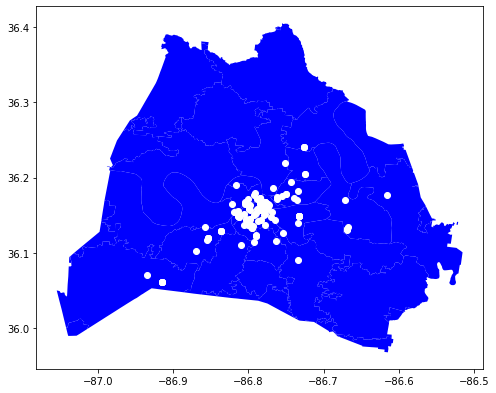

In [25]:
ax = zipcodes.plot(figsize = (8,10), color = 'blue')
art_zip.plot(ax = ax, color = 'white')
plt.show()


In [28]:
center = zipcodes['geometry'].centroid[55]
print(center)

POINT (-86.75977506278306 36.39849545443371)


In [21]:
area_center = [center.y, center.x]
print(area_center)

[36.398495454433714, -86.75977506278306]


In [37]:
map_zipcodes = folium.Map(location = area_center)
map_zipcodes

In [30]:
art_zip

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,index_right,zip,po_name
0,Tommy Owen,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.128560,-86.836600,"(36.12856, -86.8366)",POINT (-86.83660 36.12856),32,37205,NASHVILLE
3,Angel,Ralston,William,"4715 Harding Pike, Nashville TN",Stone on concrete and brick base,Sculpture,An elongated figure consisting of a stylized f...,36.119750,-86.853430,"(36.11975, -86.85343)",POINT (-86.85343 36.11975),32,37205,NASHVILLE
6,Cross Country Runners,Frost,Miley,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.128560,-86.836600,"(36.12856, -86.8366)",POINT (-86.83660 36.12856),32,37205,NASHVILLE
10,Samaritan,Wise,Scott,"4715 Harding Pike, Nashville TN",Indiana limestone,Sculpture,NaN,36.119750,-86.853430,"(36.11975, -86.85343)",POINT (-86.85343 36.11975),32,37205,NASHVILLE
14,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.128560,-86.836600,"(36.12856, -86.8366)",POINT (-86.83660 36.12856),32,37205,NASHVILLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Threshold,Sorci,Joe,"2 Titans Way, Nashville TN",Found metal objects,Sculpture,Installation of found industrial metal.,36.165380,-86.773640,"(36.16538, -86.77364)",POINT (-86.77364 36.16538),31,37213,NASHVILLE
96,Incline,Sorci,Joe,"2 Titans Way, East Bank Greenway, Nashville, TN",Salvaged industrial steel,Sculpture,NaN,36.164161,-86.772318,"(36.164161, -86.772318)",POINT (-86.77232 36.16416),31,37213,NASHVILLE
118,Rolling Hills,Ulibarri,Jerry,"3700 James Kay Lane, Hermitage, TN",Acrylic on canvas,Mural,NaN,36.177040,-86.615640,"(36.17704, -86.61564)",POINT (-86.61564 36.17704),46,37076,HERMITAGE
151,Migration,Prado,Jairo,"2195 Nolensville Pike, Nashville TN",Porcelain tile,Mural,Migration was inspired by my personal experien...,36.126480,-86.753410,"(36.12648, -86.75341)",POINT (-86.75341 36.12648),49,37211,NASHVILLE


In [36]:
cluster_zip = folium.Map(location = area_center)
marker_cluster = MarkerCluster().add_to(cluster_zip)
for row_index, row_values in art_zip.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Type'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(marker_cluster)


cluster_zip